# Sound Analysis # 

### Pt I ###

Pt. I of this notebook aims to explore different ways of visualizing sound in Python, from loading in the audio file, displaying the file as a wave plot, separating the percussive and harmonic elements of the sound, to visualizing the elements with spectrograms. Pt I also aims to gain a better understanding of the usage of Librosa package for music and audio analysis, which provides the building blocks necessary to create music information retrieval systems.

### Pt II ###

Pt II focuses on feature extraction of the audio data. 

### Pt III ###

Train the model. 

### Pt IV ###

Create self generating sounds. 

In [2]:
from __future__ import print_function

In [3]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the sound files ###

In [5]:
# Load the sound track
sound_jazz = 'background-music-jazz-trimmed.wav'
sound_rain = 'thegloomworker_rain-drips.mp3'
sound_woods = 'woods.wav'

# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y, sr = librosa.load(sound_woods, duration=10.0)

In [6]:
# Play back!
IPython.display.Audio(data=y, rate=sr)

In [7]:
# Separating harmonic and percussive components
y_h, y_p = librosa.effects.hpss(y)

In [8]:
# Play the percussive component
IPython.display.Audio(data=y_p, rate=sr)

### Visualizing in the audio files in waveplots, separating them in percussive and harmonic components ###

Text(0, 0.5, 'Amplitude')

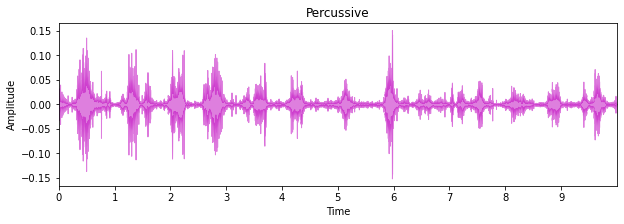

In [9]:
# Visualize the percusssive component in waveplot
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(10,3)) #needs to set size before calling plt.plot()
librosa.display.waveplot(y_perc, sr=sr, color='m', linewidth=1, alpha=0.5)
plt.title('Percussive')
plt.ylabel('Amplitude')

In [10]:
# Play the harmonic component
IPython.display.Audio(data=y_h, rate=sr)

Text(0, 0.5, 'Amplitude')

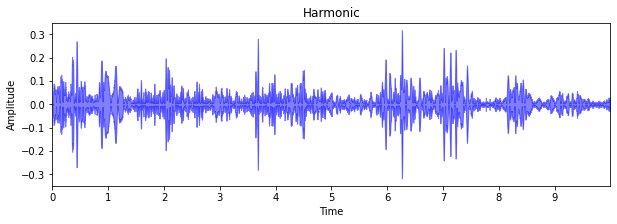

In [11]:
# Visualize the harmonic component
plt.figure(figsize=(10,3)) 
librosa.display.waveplot(y_harm, sr=sr, color='b', linewidth=1, alpha=0.5)
plt.title('Harmonic')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

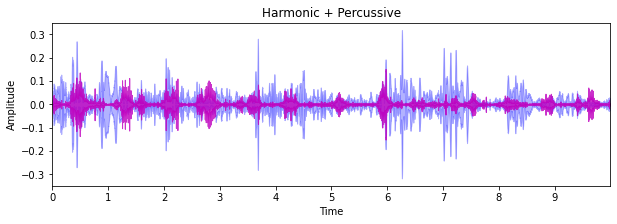

In [12]:
# Visualize both the components
plt.figure(figsize=(10,3)) 
librosa.display.waveplot(y_harm, sr=sr, color='b', linewidth=1, alpha=0.3)
librosa.display.waveplot(y_perc, sr=sr, color='m', linewidth=1, alpha=0.8)
plt.title('Harmonic + Percussive')
plt.ylabel('Amplitude')

### Spectrogram ###

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

### Short Term Fourier Transform ###
STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .stft() converts data into short term Fourier transform. 

Mechanism of Short Term Fourier Transform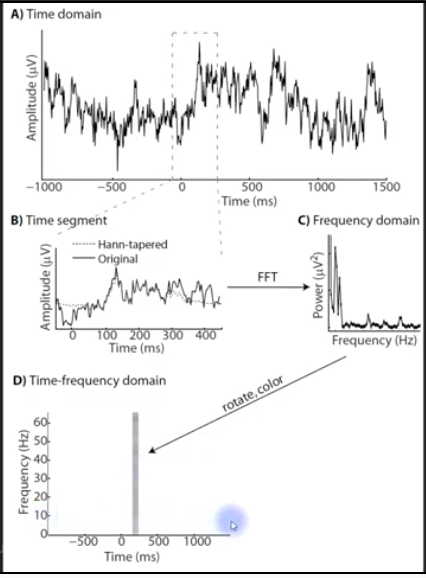

Source: <br>https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html <br>
        https://www.youtube.com/watch?v=T9x2rvdhaIE&ab_channel=AndrewNicoll

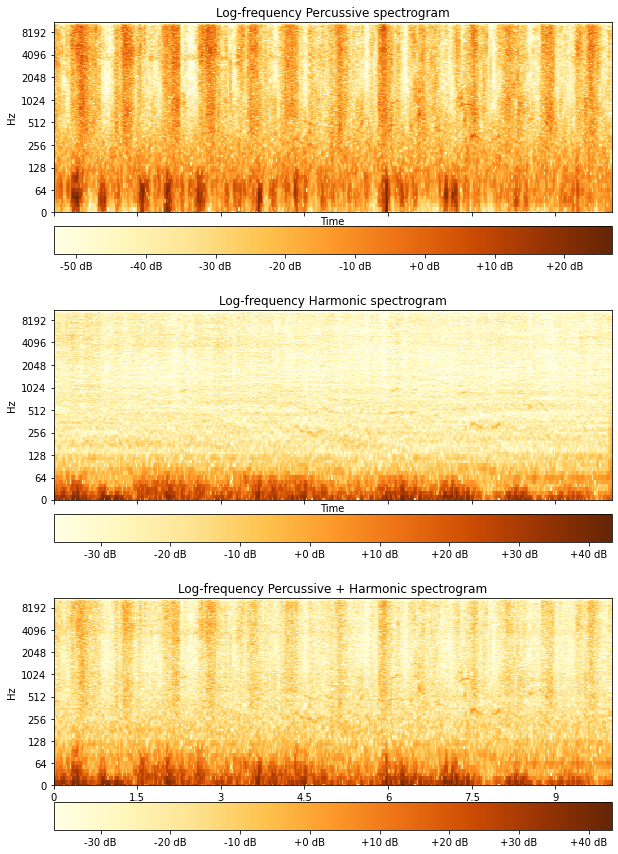

In [17]:
# Visualize the track using spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)))
D_perc = librosa.amplitude_to_db(np.abs(librosa.stft(y_perc)))
D_harm = librosa.amplitude_to_db(np.abs(librosa.stft(y_harm)))
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,15))
# set fig size for larger y-axis
# fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,40))

img0 = librosa.display.specshow(D_perc, y_axis='log', x_axis='time', sr=sr, ax=ax[0], cmap='YlOrBr')
ax[0].set(title='Log-frequency Percussive spectrogram')
fig.colorbar(img0, ax=ax[0], format='%+2.0f dB', orientation='horizontal', pad=0.06)

img1 = librosa.display.specshow(D_harm, y_axis='log', x_axis='time', sr=sr, ax=ax[1], cmap='YlOrBr')
ax[1].set(title='Log-frequency Harmonic spectrogram')
fig.colorbar(img1, ax=ax[1], format='%+2.0f dB', orientation='horizontal', pad=0.06)

img2 = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr, ax=ax[2], cmap='YlOrBr')
ax[2].set(title='Log-frequency Percussive + Harmonic spectrogram')
fig.colorbar(img2, ax=ax[2], format='%+2.0f dB', orientation='horizontal', pad=0.07)

<b>This concludes the Pt I of the audio analysis.